# DS 3000 - Assignment [11]

**Student Name**: [Ivan Ng]

**Date**: [3/26/24]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.


In [1]:
import pandas as pd

# Load the dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Display the first few rows of the dataframe to verify that the data has been loaded correctly
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# View the dimensions
print(diabetes_df.shape)

(768, 9)


In [3]:
# Get the statistical summary
summary_stats = diabetes_df.describe()

print(summary_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [4]:
# Pregnancies: The average number of pregnancies is around 3.85, with a maximum of 17. 
# This indicates that the majority of individuals in the dataset have had fewer pregnancies, 
# but some outliers have had a significantly higher number of pregnancies.
# Glucose: The average is approximately 120.89, with a standard deviation of about 31.97. 
# The minimum value of 0 seems to be an anomaly or missing data point, as glucose levels cannot be zero.
# Blood Pressure: The average is around 69.11, with a standard deviation of approximately 19.36. 
# There are instances where blood pressure readings are zero, which could be indicative of missing or erroneous data.
# Skin Thickness: The average is about 20.54, with a standard deviation of approximately 15.95. 
# The minimum value of 0 for skin thickness might indicate missing or erroneous data, as skin thickness cannot be zero.
# Insulin: The average is approximately 79.80, with a standard deviation of about 115.24. 
# Similar to other features, there are instances where insulin levels are zero, which could indicate missing data.
# BMI: The average is around 31.99, with a standard deviation of approximately 7.88. 
# BMI values of zero are present, which could be indicative of missing data.
# Diabetes Pedigree Function: The mean value of the diabetes pedigree function is about 0.47,
# with a standard deviation of approximately 0.33.
# Age: The average age of individuals in the dataset is approximately 33.24 years, 
# with a standard deviation of about 11.76. The age range varies from 21 to 81 years.
# Outcome: The outcome variable represents whether an individual has diabetes (1) or not (0). 
# The dataset is imbalanced, with around 35% of individuals having diabetes and 65% not having diabetes.

## Question 2: 
Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.


Text(0, 0.5, 'Frequency')

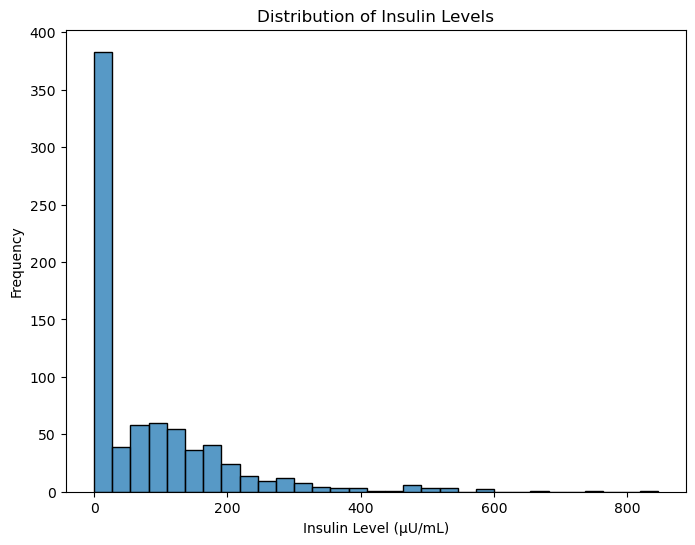

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis: Histogram of Insulin levels
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['Insulin'])
plt.title('Distribution of Insulin Levels')
plt.xlabel('Insulin Level (µU/mL)')
plt.ylabel('Frequency')

In [6]:
# The insulin levels are skewed right.
# The highest frequency making up nearly half of the count
# is comprised in the 0 to 40 range.
# This is very odd since the average is nearly double that.
# This is explained by the few insulin levels at 200+ which
# comparitively hold a huge sway in increasing the average.

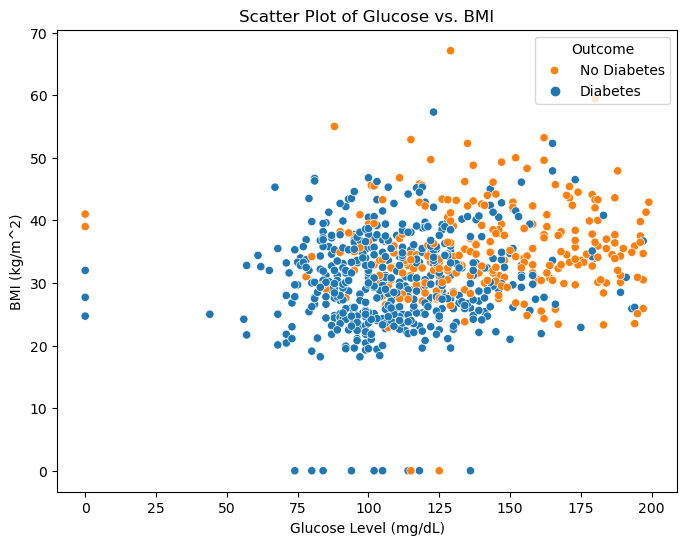

In [7]:
# Pairwise analysis: Scatter plot of Glucose vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', data=diabetes_df, hue='Outcome')
plt.title('Scatter Plot of Glucose vs. BMI')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('BMI (kg/m^2)')
plt.legend(title='Outcome', loc='upper right', labels=['No Diabetes', 'Diabetes'])

In [8]:
# This shows the relationship between glucose and BMI.
# Upon looking there seems to be invalid data points caused by 
# having 0 glucose or 0 BMI.
# Disregarding outliers, for the most part the people with
# diabetes are more comprised on the right side of the graph.
# This means that on average the people with diabetes are the ones
# that have higher glucose per BMI.
# This can be a pretty reliable theory because glucose is sugar
# and higher sugar levels can correlate to obesity and diabetes.

## Question 3: 

Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [9]:
# Check for null values per column
null_values_per_column = diabetes_df.isnull().sum()

print(null_values_per_column)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Check how many values are equal to 0 per column
zero_values_per_column = (diabetes_df == 0).sum()

print(zero_values_per_column)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [11]:
# Remove 0's from Glucose, Insulin, BMI, SkinThickness, BloodPressure
diabetes_df = diabetes_df[diabetes_df['Glucose'] != 0]
diabetes_df = diabetes_df[diabetes_df['Insulin'] != 0]
diabetes_df = diabetes_df[diabetes_df['BMI'] != 0]
diabetes_df = diabetes_df[diabetes_df['SkinThickness'] != 0]
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] != 0]

zero_values_per_column = (diabetes_df == 0).sum()

print(zero_values_per_column)

Pregnancies                  56
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     262
dtype: int64


Text(0, 0.5, 'Frequency')

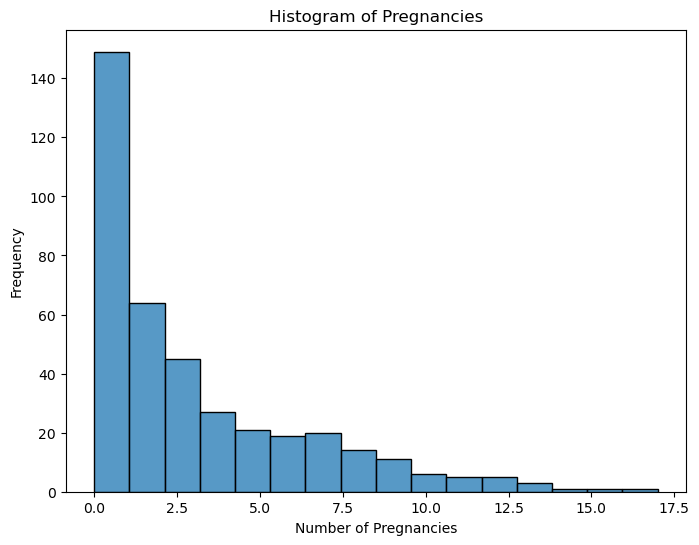

In [12]:
# Create histogram using seaborn for pregnancies
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['Pregnancies'])
plt.title('Histogram of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

In [13]:
# Pregnancies have plausible values since theres no entry
# with an abnormal number of pregnancies.

Text(0, 0.5, 'Frequency')

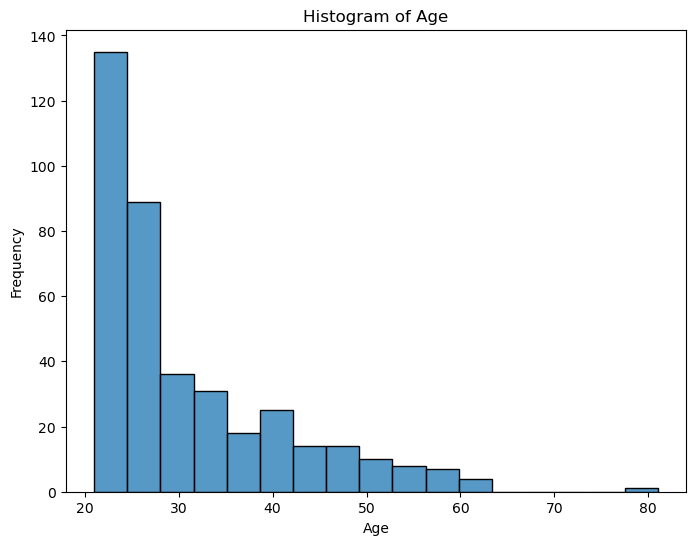

In [14]:
# Create histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_df['Age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [15]:
# All age entries are plausible.

## Question 4: 

Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.

In [16]:
# Display data types of all columns in the DataFrame
# No categorical data to encode
print(diabetes_df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_df['Outcome']

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize numerical data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Question 5: 

Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict values from the model for the test
y_pred = svm_model.predict(X_test)

print('The predicted Outcome is {}'.format(y_pred))

The predicted Outcome is [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 0 0]


In [21]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.7288135593220338
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        80
           1       0.59      0.53      0.56        38

    accuracy                           0.73       118
   macro avg       0.69      0.68      0.68       118
weighted avg       0.72      0.73      0.72       118



In [22]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Set hyperparametes
params = {'C': np.arange(0.1, 0.2, 0.005),
         'gamma': np.arange(0.01, 0.1, 0.005)}

# Use GridSearch
svm_grid = GridSearchCV(svm_model, params, cv=5)
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 0.17500000000000007, 'gamma': 0.049999999999999996}
0.7847811447811448


In [23]:
from sklearn.model_selection import cross_val_score

# Define the SVM model with the best hyperparameters
final_svm_model = SVC(C=0.175, gamma=0.05)

# Perform cross-validation
cv_scores = cross_val_score(final_svm_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.76363636 0.72727273 0.81818182 0.8        0.81481481]
Mean Cross-Validation Score: 0.7847811447811448


## Question 6: 

Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?


In [24]:
# Retrieve the best model from GridSearchCV
best_model = svm_grid.best_estimator_

# Evaluate the best model on the training set
train_score = best_model.score(X_train, y_train)

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

print("Training Set Score:", train_score)
print("Test Set Score:", test_score)

Training Set Score: 0.791970802919708
Test Set Score: 0.7542372881355932


In [25]:
# The difference in Training and Test set scores are
# quite similar with a difference in only 3 or 4 percent.
# Since they are very similar there is a very good balance between
# bias and variance which means it should not have any problems.
# The model itself has a score of about 80 which is an alright quality.
# It can quite accurately predict the target.
# The prediction is useful but I would not advocate for its use in
# the medical industry because the classification report provided
# inadequately high statistics.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
